In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read Excel spreadsheet containing sales data into pandas
parse_dates_col = ["transaction_date", 'transaction_time']
excel_file = "../data/Coffee Shop Sales.xlsx"

coffee_sales_df = pd.read_excel(excel_file, parse_dates=parse_dates_col)

/var/folders/8n/m9bszjl97ys6gcj4yzvmwlnc0000gn/T/ipykernel_67335/676406809.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coffee_sales_df = pd.read_excel(excel_file, parse_dates=parse_dates_col)


In [3]:
coffee_sales_df.shape

(149116, 11)

In [4]:
#Review dtypes
coffee_sales_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  datetime64[ns]
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 47.7 MB


In [5]:
coffee_sales_df.head(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,2024-05-20 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,2024-05-20 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,2024-05-20 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,2024-05-20 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,2024-05-20 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
5,6,2023-01-01,2024-05-20 07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
6,7,2023-01-01,2024-05-20 07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,2024-05-20 07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,2024-05-20 07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
9,10,2023-01-01,2024-05-20 07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg


In [6]:
# add a revenue column

coffee_sales_df["transaction_revenue"] = coffee_sales_df["transaction_qty"] * coffee_sales_df["unit_price"]

coffee_sales_df.head(2)


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_revenue
0,1,2023-01-01,2024-05-20 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,2024-05-20 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


In [7]:
# extract date and time value columns

coffee_sales_df['month_number'] = coffee_sales_df['transaction_date'].dt.month
coffee_sales_df['month_name'] = coffee_sales_df['transaction_date'].dt.month_name()
coffee_sales_df['day_of_week_number'] = coffee_sales_df['transaction_date'].dt.weekday
coffee_sales_df['day_of_week_name'] = coffee_sales_df['transaction_date'].dt.day_name()
coffee_sales_df['day_of_week_name'] = coffee_sales_df['transaction_date'].dt.day_name()
coffee_sales_df['transaction_hour'] = coffee_sales_df['transaction_time'].dt.hour

coffee_sales_df['transaction_time'] = coffee_sales_df['transaction_time'].dt.time.astype(str)

coffee_sales_df.head(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_revenue,month_number,month_name,day_of_week_number,day_of_week_name,transaction_hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,1,January,6,Sunday,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,January,6,Sunday,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,1,January,6,Sunday,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,1,January,6,Sunday,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,January,6,Sunday,7


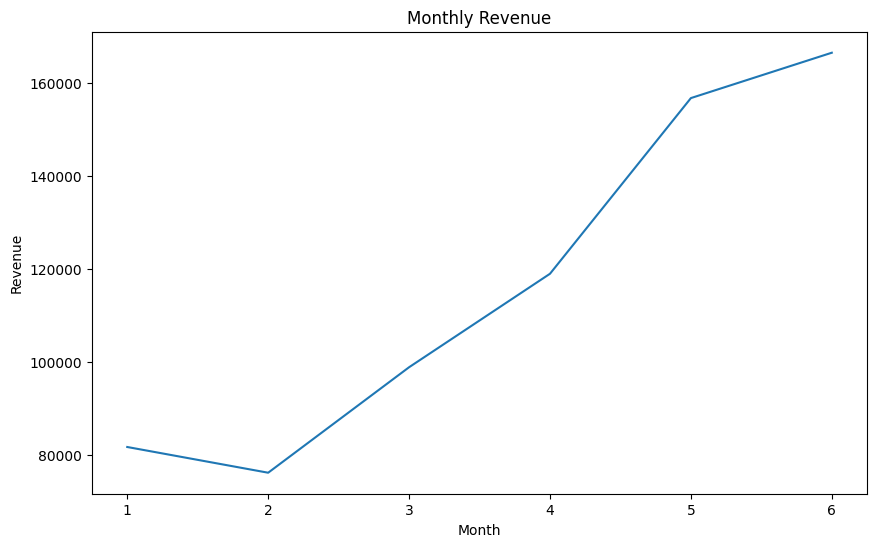

In [13]:
# chart revenue by month. Group revenue by month and calculate sum
monthly_revenue = coffee_sales_df.groupby(coffee_sales_df['transaction_date'].dt.month)['transaction_revenue'].sum()

# Plot revenue by month
monthly_revenue.plot.line(figsize=(10, 6), title="Monthly Revenue", xlabel="Month", ylabel="Revenue")
plt.show()

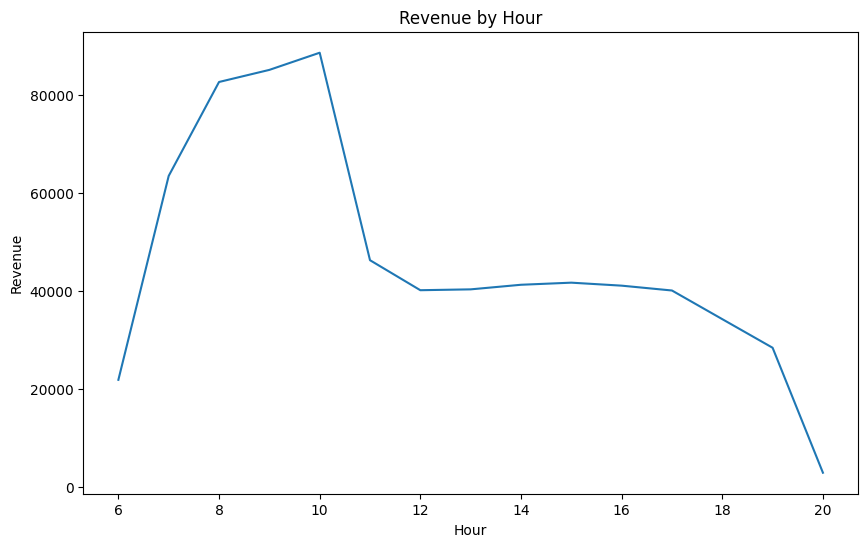

In [16]:
# chart revenue by hour of the day. Group revenue by hour and calculate sum
hourly_revenue = coffee_sales_df.groupby("transaction_hour")['transaction_revenue'].sum()

# Plot revenue by hour
hourly_revenue.plot.line(figsize=(10, 6), title="Revenue by Hour", xlabel="Hour", ylabel="Revenue")
plt.show()


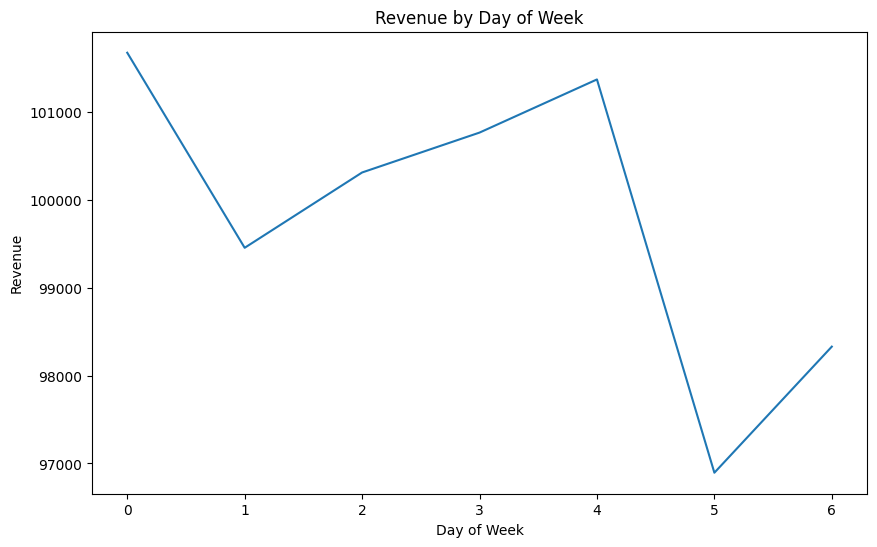

In [21]:
# chart revenue by hour of the day. Group revenue by hour and calculate sum

# Group revenue by day of the week and calculate sum
daily_revenue_by_weekday = coffee_sales_df.groupby("day_of_week_number")['transaction_revenue'].sum()

# Customize x-axis labels for better readability (optional)
daily_revenue_by_weekday.plot.line(figsize=(10, 6), title="Revenue by Day of Week", xlabel="Day of Week", ylabel="Revenue")
plt.show()

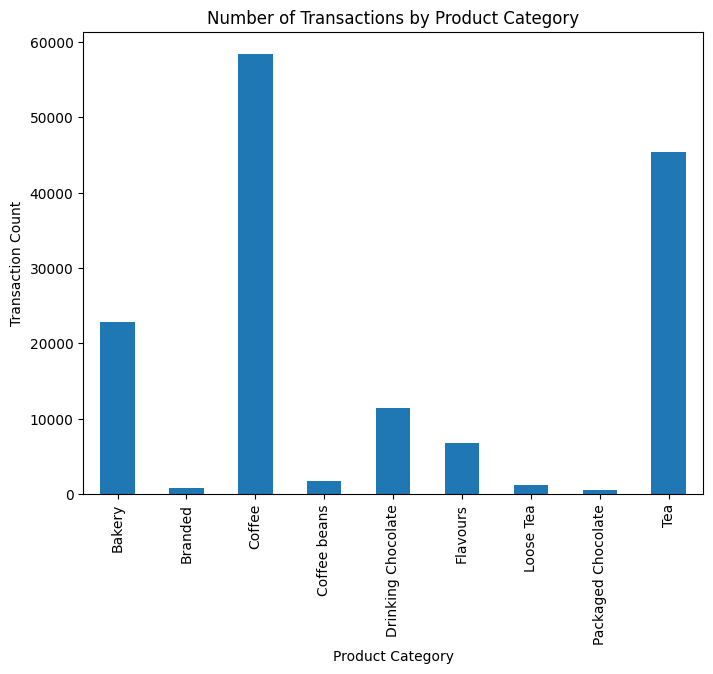

In [8]:
# chart number of transactions by product category. Group by product category and count transactions
product_category_counts = coffee_sales_df.groupby('product_category')['transaction_id'].count()  # Replace 'transaction_id' with your unique identifier

# Plot the counts (replace with your preferred plot type)
product_category_counts.plot.bar(figsize=(8, 6), title="Number of Transactions by Product Category", 
                                 xlabel="Product Category", ylabel="Transaction Count")
plt.show()

<Axes: title={'center': 'Transactions & Revenue by Product Type'}, xlabel='Product Type', ylabel='Count/Revenue'>

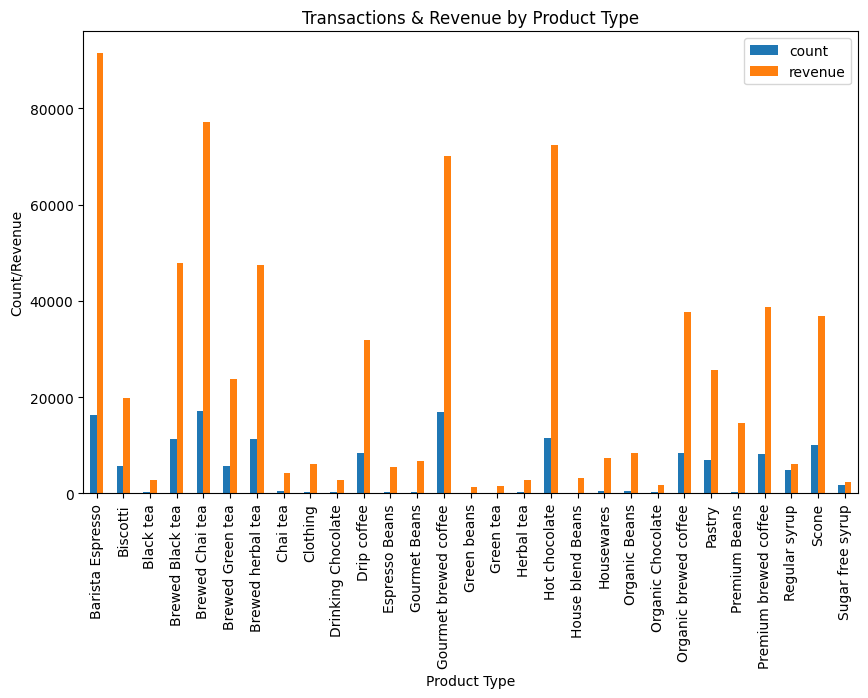

In [11]:
# chart number of transactions and revenue by and revenue by product type. Group by product type and calculate sum/count
product_type_summary = coffee_sales_df.groupby('product_type').agg(count=('transaction_id', 'count'), revenue=('transaction_revenue', 'sum'))

product_type_summary.plot(kind='bar', figsize=(10, 6), title="Transactions & Revenue by Product Type", 
                             xlabel="Product Type", ylabel="Count/Revenue")

In [22]:
# export copy of dataframe to be used in Streamlit app
csv_file = "../data/CoffeeShopSales_processed.csv"
coffee_sales_df.to_csv(csv_file, index=False)